# **Importing Data**

In [2]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns
plt.style.use('ggplot')

In [9]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# **EDA**

In [10]:
data.drop('id',axis=1,inplace=True)

In [11]:
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [12]:
data['target']=data[['Pastry',	'Z_Scratch'	,'K_Scatch',	'Stains',	'Dirtiness',
                     'Bumps',	'Other_Faults']].idxmax(axis=1)

In [13]:
data.drop(['Pastry',	'Z_Scratch'	,'K_Scatch',	'Stains',	'Dirtiness',
                     'Bumps',	'Other_Faults'],axis=1 , inplace=True)

In [14]:
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,584,590,909972,909977,16,8,5,2274,113,140,...,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,Stains
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,Other_Faults
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,K_Scatch
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,K_Scatch
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,Other_Faults


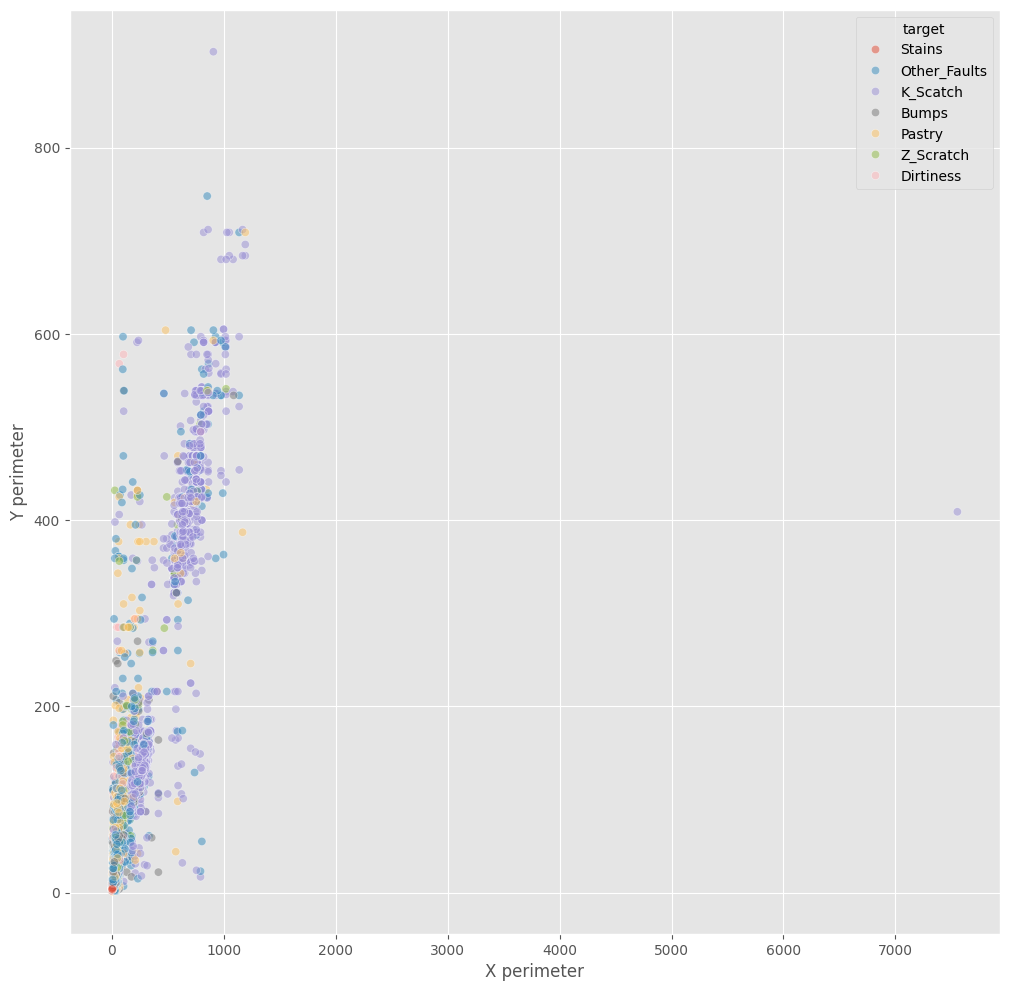

In [33]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x='X_Perimeter', y='Y_Perimeter', hue='target',alpha=0.5)
plt.xlabel('X perimeter')
plt.ylabel('Y perimeter')
plt.show()

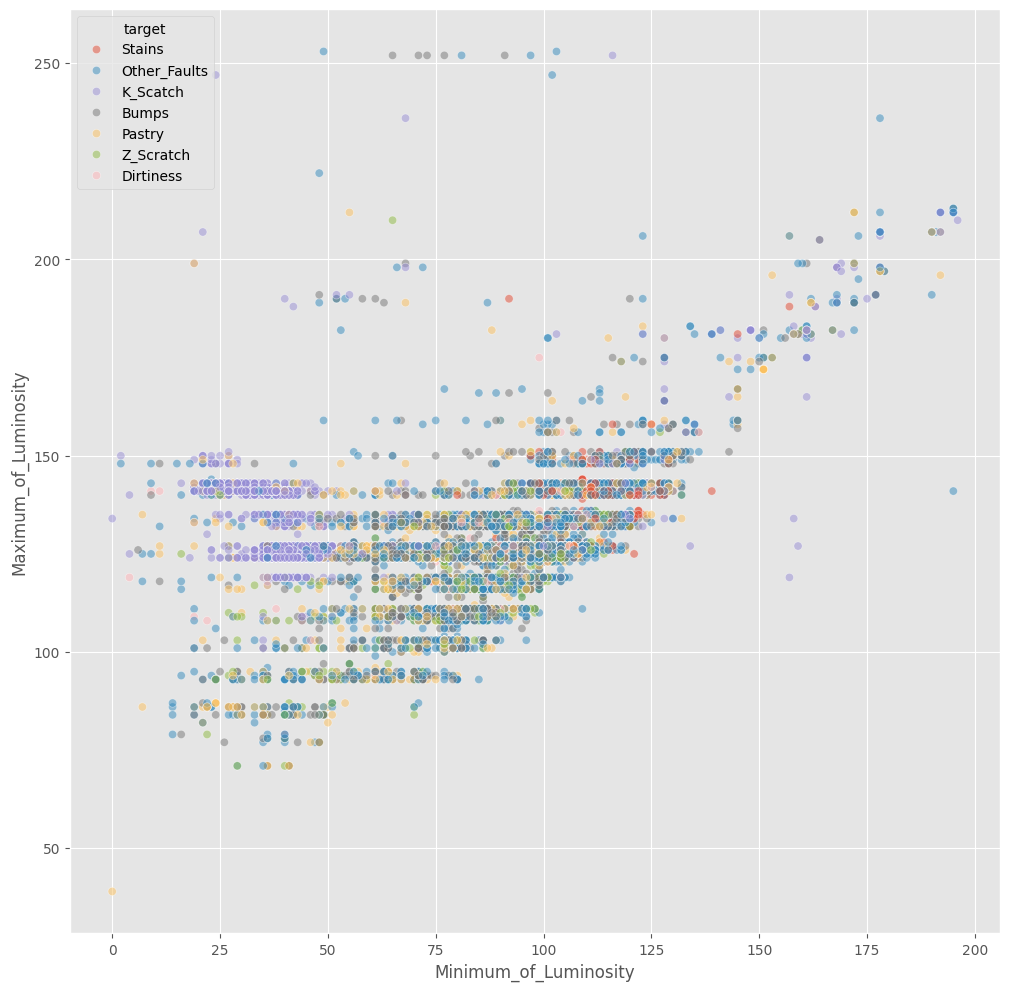

In [36]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x='Minimum_of_Luminosity', y='Maximum_of_Luminosity', hue='target',alpha=0.5)
plt.xlabel('Minimum_of_Luminosity')
plt.ylabel('Maximum_of_Luminosity')
plt.show()

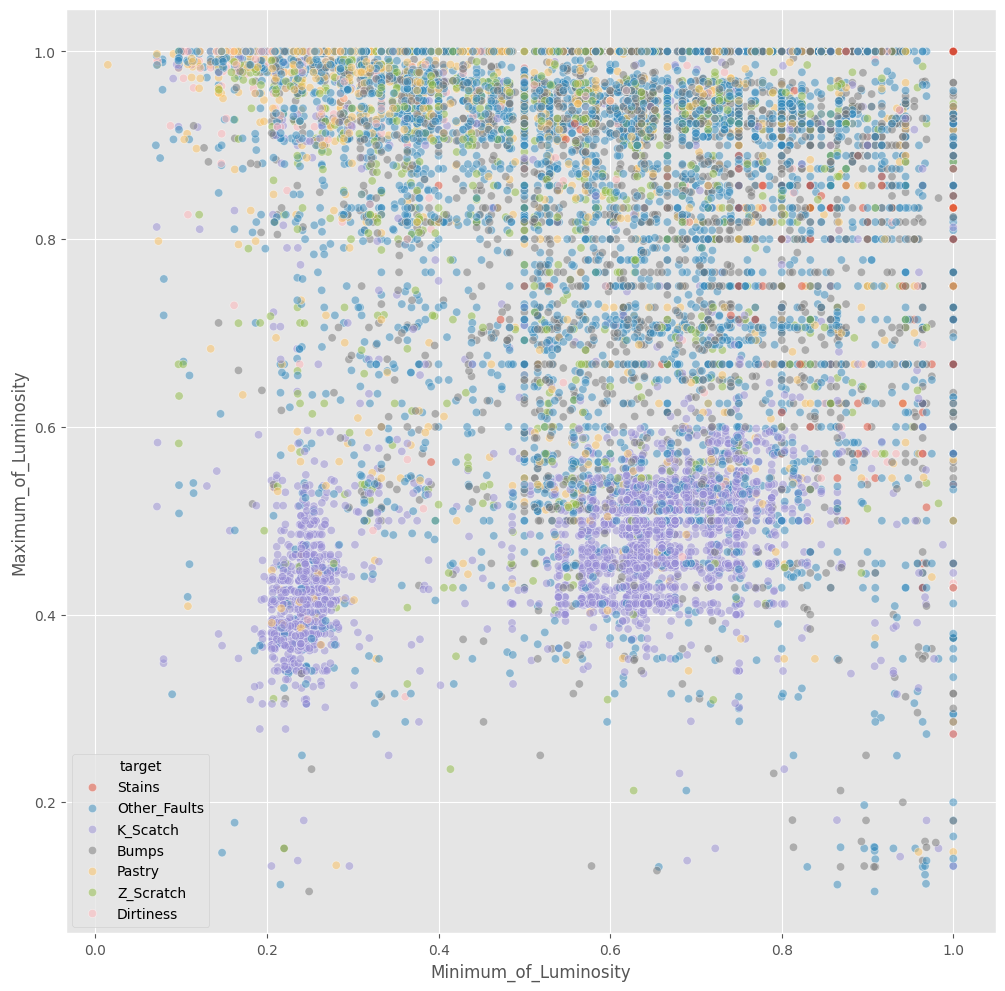

In [37]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x='Edges_X_Index', y='Edges_Y_Index', hue='target',alpha=0.5)
plt.xlabel('Minimum_of_Luminosity')
plt.ylabel('Maximum_of_Luminosity')
plt.show()

# **Features engineering**

<ipython-input-42-09899fcae015>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


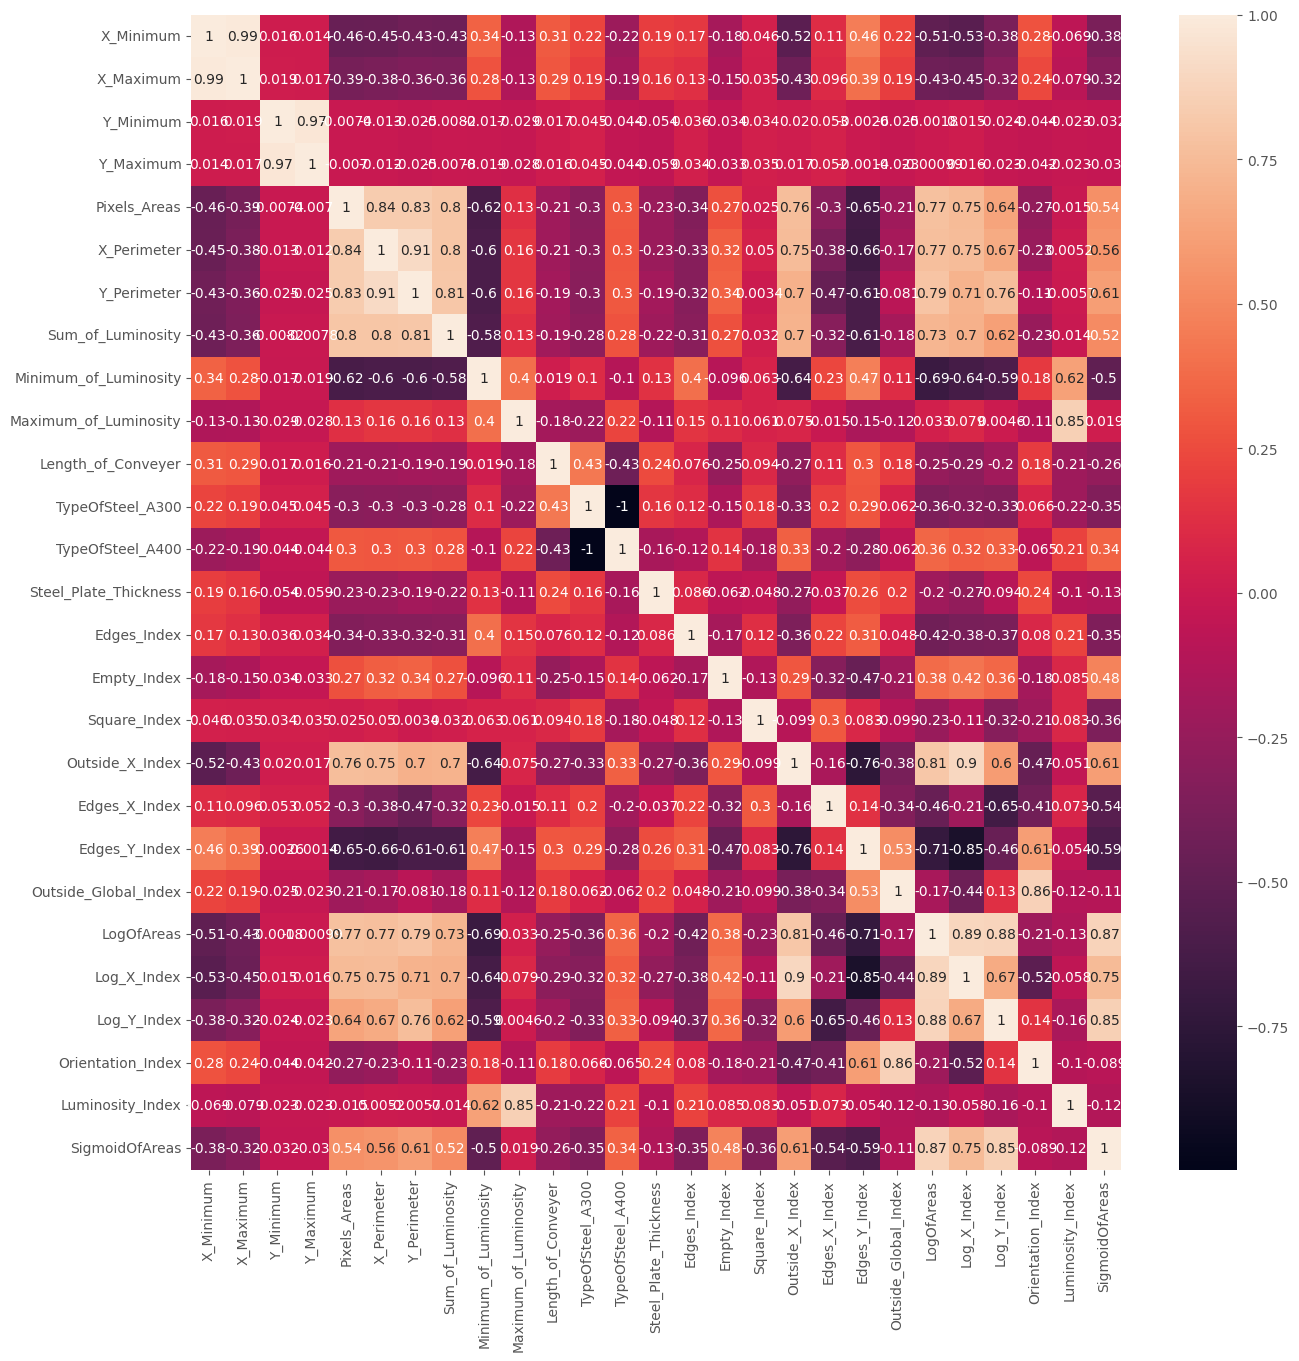

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [7]:
correlation_matrix = data.corr()
correlation_matrix.shape

<ipython-input-7-536c8b98075f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


(27, 27)

In [8]:
correlation_matrix = data.corr()

abs_correlation_matrix = correlation_matrix.abs()

threshold = 0.8

high_correlation_indices = [(i, j) for i in range(abs_correlation_matrix.shape[0])
                            for j in range(i+1, abs_correlation_matrix.shape[1])
                            if abs_correlation_matrix.iloc[i, j] >= threshold]

columns_to_drop = []

for i, j in high_correlation_indices:
    col_i = abs_correlation_matrix.columns[i]
    col_j = abs_correlation_matrix.columns[j]

    if col_i != 'target' and col_j != 'target':
        if col_i == col_j:
            continue
        else:
            columns_to_drop.append(col_i if abs_correlation_matrix.iloc[i, 26] < abs_correlation_matrix.iloc[26, j] else col_j)

columns_to_drop = list(set(columns_to_drop))


<ipython-input-8-fa00511fee5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [9]:
data=data.drop(columns_to_drop,axis=1)
test=test.drop(columns_to_drop,axis=1)

In [56]:
data.head()

,X_Minimum,Y_Minimum,Y_Perimeter,Minimum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Edges_X_Index,Outside_Global_Index,Luminosity_Index,SigmoidOfAreas,target
0,584,909972,5,113,1358,0,50,0.7393,0.4000,0.5000,1.0000,0.0,-0.0104,0.1417,Stains
1,808,728350,54,70,1687,1,80,0.7772,0.2878,0.2581,0.2500,1.0,-0.2997,0.9491,Other_Faults
2,39,2212076,420,29,1400,0,40,0.0557,0.5282,0.9895,0.2363,0.0,-0.0944,1.0000,K_Scatch
3,781,3353146,29,114,1387,0,40,0.7202,0.3333,0.3333,0.3750,1.0,-0.0402,0.4025,K_Scatch
4,1540,618457,67,82,1692,0,300,0.1211,0.5347,0.0842,0.2105,1.0,-0.2455,0.9998,Other_Faults


<ipython-input-54-09899fcae015>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


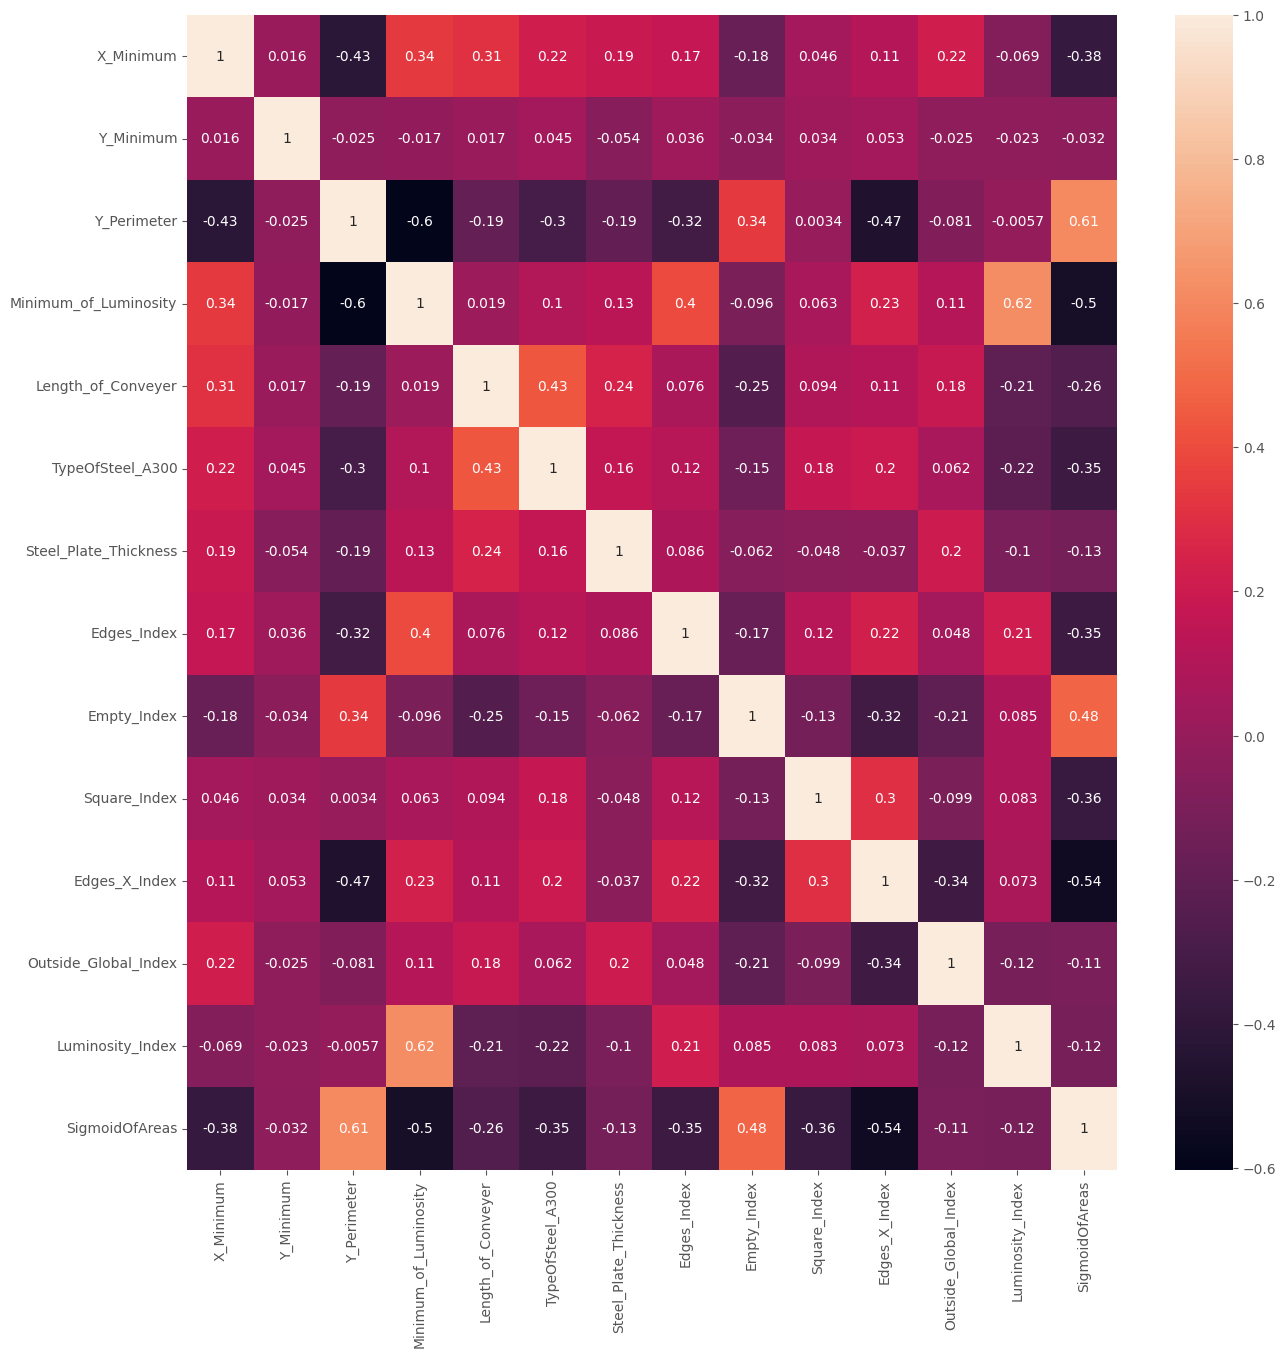

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
data[['p1', 'p2', 'p3', 'p4', 'p5']] = pca.fit_transform(data.drop('target', axis=1))


In [16]:
test[['p1', 'p2', 'p3', 'p4', 'p5']] = pca.fit_transform(test)

In [58]:
data.head()

,X_Minimum,Y_Minimum,Y_Perimeter,Minimum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Edges_X_Index,Outside_Global_Index,Luminosity_Index,SigmoidOfAreas,target,p1,p2,p3,p4,p5
0,584,909972,5,113,1358,0,50,0.7393,0.4000,0.5000,1.0000,0.0,-0.0104,0.1417,Stains,-9.397840e+05,-124.716649,-86.224964,-78.734664,-24.061849
1,808,728350,54,70,1687,1,80,0.7772,0.2878,0.2581,0.2500,1.0,-0.2997,0.9491,Other_Faults,-1.121406e+06,123.744386,217.764441,16.918268,-18.512265
2,39,2212076,420,29,1400,0,40,0.0557,0.5282,0.9895,0.2363,0.0,-0.0944,1.0000,K_Scatch,3.623200e+05,-703.933805,-19.537172,301.929984,5.578351
3,781,3353146,29,114,1387,0,40,0.7202,0.3333,0.3333,0.3750,1.0,-0.0402,0.4025,K_Scatch,1.503390e+06,59.820913,-80.975505,-35.115465,-30.720972
4,1540,618457,67,82,1692,0,300,0.1211,0.5347,0.0842,0.2105,1.0,-0.2455,0.9998,Other_Faults,-1.231299e+06,854.425563,170.216240,67.780769,196.979180


# **1st Processing**

In [10]:
data2=data.copy()

In [185]:
X=data2.drop('target',axis=1)
col=X.columns

In [186]:
y=data2['target']

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X=ss.fit_transform(X)
X=pd.DataFrame(X,columns=col)

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y, columns=['target'])

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X,y)

<ipython-input-82-513d11dda2b7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X,y)


RandomForestClassifier()

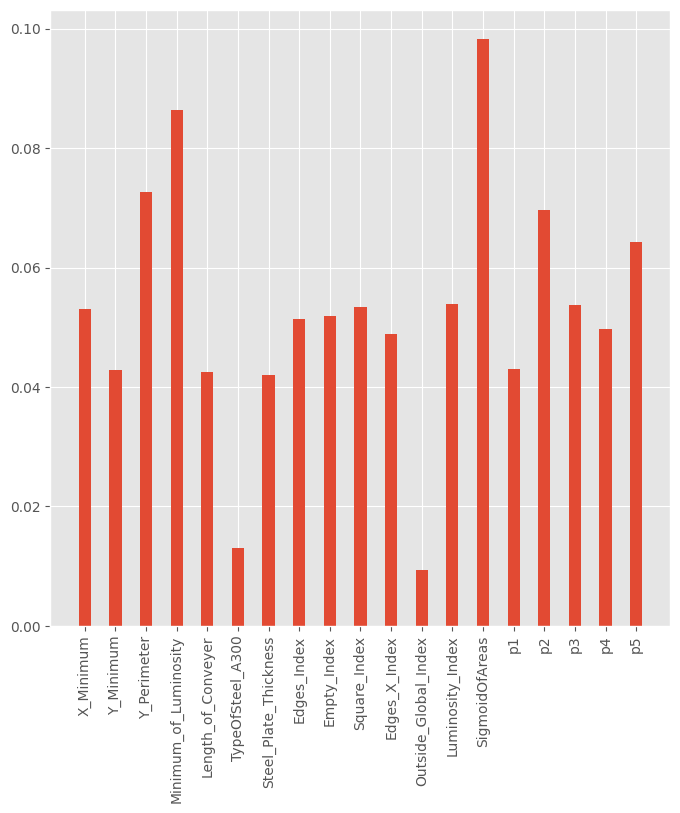

In [89]:
feature_importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 8))
plt.bar(feature_names, feature_importances, width=0.4)
plt.xticks(rotation=90)
plt.show()

In [187]:
other_columns_to_drop = []
threshold = 0.045

for c in X.columns:
    if feature_importances[X.columns.get_loc(c)] < threshold:
        other_columns_to_drop.append(c)

In [188]:
other_columns_to_drop

['Y_Minimum',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'Steel_Plate_Thickness',
 'Outside_Global_Index',
 'p1']

In [189]:
data2=data2.drop(other_columns_to_drop,axis=1)


In [190]:
test=test.drop(other_columns_to_drop,axis=1)

In [213]:
X=data2.drop('target',axis=1)
y=data2['target']

In [301]:
col=X.columns


In [214]:
col=X.columns
ss = StandardScaler()
X=ss.fit_transform(X)
X=pd.DataFrame(X,columns=col)

In [215]:
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y, columns=['target'])

# **Machine Learning model for 1st processing**

In [220]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=56)

In [228]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

train_prob = clf.predict_proba(x_train)
test_prob = clf.predict_proba(x_test)

# Binarize the labels
y_train_bin = label_binarize(y_train, classes=clf.classes_)
y_test_bin = label_binarize(y_test, classes=clf.classes_)

# Compute ROC AUC for each class
train_roc_auc = roc_auc_score(y_train_bin, train_prob, average='macro')
test_roc_auc = roc_auc_score(y_test_bin, test_prob, average='macro')

print("Training ROC AUC (macro average):", train_roc_auc)
print("Test ROC AUC (macro average):", test_roc_auc)


<ipython-input-228-467a2a01da37>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Training ROC AUC (macro average): 1.0
Test ROC AUC (macro average): 0.8415896947275056


In [238]:
import optuna
def objective(trial):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 10, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Create and train the RandomForestClassifier with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set using ROC AUC
    y_prob = model.predict_proba(X_val)
    roc_auc = roc_auc_score(y_val, y_prob, multi_class='ovr', average='macro')

    return roc_auc

if __name__ == "__main__":
    # Replace X and y with your feature matrix and target vector
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=10)

    # Print the best hyperparameters and the corresponding ROC AUC
    print('Best trial:')
    trial = study.best_trial
    print('ROC AUC:', trial.value)
    print("Best hyperparameters:", trial.params)


[I 2024-03-03 12:05:48,723] A new study created in memory with name: no-name-04bc142e-88f9-40f1-85a1-13c2bcd8e8c1
<ipython-input-238-3b1407c9c4bb>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
[I 2024-03-03 12:05:50,847] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 211, 'max_depth': 2, 'min_samples_split': 0.3760006426528243, 'min_samples_leaf': 0.3505615579982221, 'max_features': 'log2'}. Best is trial 0 with value: 0.5.
<ipython-input-238-3b1407c9c4bb>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavi

Best trial:
ROC AUC: 0.8076625909319995
Best hyperparameters: {'n_estimators': 804, 'max_depth': 12, 'min_samples_split': 0.2566255874828176, 'min_samples_leaf': 0.12989702372447984, 'max_features': 'sqrt'}


In [240]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(x_train, y_train)

train_prob = clf.predict_proba(x_train)
test_prob = clf.predict_proba(x_test)

# Binarize the labels
y_train_bin = label_binarize(y_train, classes=clf.classes_)
y_test_bin = label_binarize(y_test, classes=clf.classes_)

# Compute ROC AUC for each class
train_roc_auc = roc_auc_score(y_train_bin, train_prob, average='macro')
test_roc_auc = roc_auc_score(y_test_bin, test_prob, average='macro')

print("Training ROC AUC (macro average):", train_roc_auc)
print("Test ROC AUC (macro average):", test_roc_auc)

Training ROC AUC (macro average): 0.9925500793157923
Test ROC AUC (macro average): 0.8442399372933632


In [243]:
def objective(trial):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


    # Create and train the RandomForestClassifier with the suggested hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'objective': 'multi:softmax',  # specify multi-class objective
        'num_class': len(set(y)),  # number of classes
        'random_state': 42
    }

    # Create and train the XGBClassifier with the suggested hyperparameters
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set using ROC AUC
    y_prob = model.predict_proba(X_val)
    roc_auc = roc_auc_score(y_val, y_prob, multi_class='ovr', average='macro')

    return roc_auc

if __name__ == "__main__":
    # Replace X and y with your feature matrix and target vector
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    # Print the best hyperparameters and the corresponding ROC AUC
    print('Best trial:')
    trial = study.best_trial
    print('ROC AUC:', trial.value)
    print("Best hyperparameters:", trial.params)


[I 2024-03-03 12:14:52,821] A new study created in memory with name: no-name-4af518e7-54f4-45e7-b752-91db4749592a
[I 2024-03-03 12:14:55,431] Trial 0 finished with value: 0.8594974616646012 and parameters: {'n_estimators': 310, 'max_depth': 5, 'learning_rate': 0.2745297956374094, 'subsample': 0.39903014971597206, 'colsample_bytree': 0.4060800664929437, 'gamma': 2.6149908408798077, 'min_child_weight': 1.7710595393160014, 'reg_alpha': 1.2163503162267482, 'reg_lambda': 0.4787306719934542}. Best is trial 0 with value: 0.8594974616646012.
[I 2024-03-03 12:14:56,593] Trial 1 finished with value: 0.8571039381659583 and parameters: {'n_estimators': 58, 'max_depth': 27, 'learning_rate': 0.1664332697875207, 'subsample': 0.6413391835243957, 'colsample_bytree': 0.31612947143359005, 'gamma': 0.8383920874154766, 'min_child_weight': 1.9107800996245312, 'reg_alpha': 2.772273932185147, 'reg_lambda': 2.587422377061797}. Best is trial 0 with value: 0.8594974616646012.
[I 2024-03-03 12:15:07,211] Trial 2 

Best trial:
ROC AUC: 0.8617586152654025
Best hyperparameters: {'n_estimators': 716, 'max_depth': 4, 'learning_rate': 0.01859409465367408, 'subsample': 0.7094706127022506, 'colsample_bytree': 0.46065279056682656, 'gamma': 1.0750359689735365, 'min_child_weight': 3.137492583888104, 'reg_alpha': 1.0337287758775768, 'reg_lambda': 0.6965189004243397}


# **ANN for 1st preprocessing**

In [257]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout ,BatchNormalization

In [245]:
x_train.shape

(15375, 13)

In [258]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(13,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def compute_roc_auc(y_true, y_prob):
    y_bin = label_binarize(y_true, classes=np.unique(y_true))
    roc_auc = roc_auc_score(y_bin, y_prob, average='macro')
    return roc_auc

# Assuming you have already defined your neural network model and compiled it

# Train the model
for epoch in range(1, 100):  # 10 epochs
    model.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test), verbose=0)
    y_prob_train = model.predict(x_train)
    roc_auc_train = compute_roc_auc(y_train, y_prob_train)
    y_prob_val = model.predict(x_test)
    roc_auc_val = compute_roc_auc(y_test, y_prob_val)
    print(f"Epoch {epoch}: Training ROC AUC = {roc_auc_train:.4f}         ,          Validation ROC AUC = {roc_auc_val:.4f}           ")


121/121 [==============================] - 0s 2ms/step
Epoch 1: Training ROC AUC = 0.8292         ,          Validation ROC AUC = 0.8309           
121/121 [==============================] - 0s 2ms/step
Epoch 2: Training ROC AUC = 0.8389         ,          Validation ROC AUC = 0.8399           
121/121 [==============================] - 0s 4ms/step
Epoch 3: Training ROC AUC = 0.8403         ,          Validation ROC AUC = 0.8410           
121/121 [==============================] - 0s 2ms/step
Epoch 4: Training ROC AUC = 0.8433         ,          Validation ROC AUC = 0.8434           
121/121 [==============================] - 0s 3ms/step
Epoch 5: Training ROC AUC = 0.8458         ,          Validation ROC AUC = 0.8451           
121/121 [==============================] - 0s 2ms/step
Epoch 6: Training ROC AUC = 0.8487         ,          Validation ROC AUC = 0.8488           
121/121 [==============================] - 0s 2ms/step
Epoch 7: Training ROC AUC = 0.8508         ,          Val

# **1st submission**

In [276]:
hyperparameters = {'n_estimators': 716, 'max_depth': 4, 'learning_rate': 0.01859409465367408, 'subsample': 0.7094706127022506, 'colsample_bytree': 0.46065279056682656, 'gamma': 1.0750359689735365, 'min_child_weight': 3.137492583888104, 'reg_alpha': 1.0337287758775768, 'reg_lambda': 0.6965189004243397}

model=XGBClassifier(**hyperparameters)

In [278]:
model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.46065279056682656, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.0750359689735365,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01859409465367408,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3.137492583888104, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=716,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [310]:
test_prob = model.predict_proba(X)

y_bin = label_binarize(y, classes=clf.classes_)

train_roc_auc = roc_auc_score(y_bin, test_prob, average='macro')


In [302]:
ss = StandardScaler()
test=ss.fit_transform(test)
test=pd.DataFrame(test,columns=col)

In [312]:
test_prob = model.predict_proba(test)

In [315]:
samp_sub=pd.read_csv('sample_submission.csv')
samp_sub.tail()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
12809,32028,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12810,32029,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12811,32030,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12812,32031,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12813,32032,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [319]:
test_prob = model.predict_proba(test)

class_names = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']
sub = pd.DataFrame(test_prob, columns=class_names)



In [320]:
print(sub.shape)
print(test.shape)
print(samp_sub.shape)

(12814, 7)
(12814, 13)
(12814, 8)


In [321]:
sub['id']=samp_sub['id']

In [326]:
sub = sub[['id'] + class_names]

In [328]:
sub.to_csv('sub3.csv', index=False)

In [307]:
test.shape

(12814, 13)

# **2nd Processing**

In [17]:
data3=data.copy()

In [18]:
data3.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target,p1,p2,p3,p4,p5
0,584,590,909972,909977,16,8,5,2274,113,140,...,0.6990,-0.5000,-0.0104,0.1417,Stains,-1.326564e+06,-1.914030e+05,-121.423226,-371.120931,-355.069251
1,808,816,728350,728372,433,20,54,44478,70,111,...,1.7324,0.7419,-0.2997,0.9491,Other_Faults,-1.583462e+06,-1.495518e+05,482.869478,-263.171480,17.249386
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,2.2095,-0.0105,-0.0944,1.0000,K_Scatch,5.131292e+05,1.120296e+06,-338.665563,2178.210947,3.156163
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,1.4314,0.6667,-0.0402,0.4025,K_Scatch,2.128610e+06,-1.857077e+05,-6929.721494,-197.126090,-73.944490
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,1.8808,0.9158,-0.2455,0.9998,Other_Faults,-1.738862e+06,-1.460133e+05,782.123199,-268.727859,1065.362969


In [19]:
test

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,p1,p2,p3,p4,p5
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,1.1139,1.6628,0.6727,-0.2261,0.9172,2.803642e+06,-1.247718e+05,-1607.377778,6420.561460,-260.146920
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.9031,1.4472,0.9063,-0.1453,0.9104,-2.013969e+06,-1.574089e+05,6265.663350,6366.257309,-435.336292
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,1.3222,1.3222,-0.5238,-0.0435,0.6514,-2.441389e+06,-1.681581e+05,7303.672536,6359.521533,-465.139679
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.6990,1.0414,0.1818,-0.0738,0.2051,-2.279126e+06,-1.886164e+05,7953.389163,6361.372107,-403.189510
4,19223,559,592,544375,544389,140,19,15,15524,103,...,1.3222,1.1461,-0.5714,-0.0894,0.4170,-1.837971e+06,-1.808061e+05,7033.857223,6364.391827,-434.820861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,...,1.2305,1.6335,0.7661,-0.3109,0.8894,-1.974334e+06,-1.750034e+05,6944.985348,-6441.839559,-277.865181
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,...,0.8451,1.2553,0.7222,-0.0448,0.1954,1.846258e+06,-1.837360e+05,2195.235943,-6406.508878,-444.907964
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,...,2.2504,2.2672,-0.0629,-0.0801,1.0000,-3.667558e+05,1.663147e+06,-73894.585105,-6226.382503,4425.014588
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,...,1.1139,1.5911,0.8461,-0.2629,0.7844,-1.614753e+06,-1.590288e+05,5789.854793,-6440.579216,-327.919397


In [20]:
test3=test.drop('id',axis=1)

In [21]:
from sklearn import set_config
set_config(transform_output='pandas')

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data3['target']=le.fit_transform(data3['target'])

In [18]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=150, max_samples='auto',
                      contamination=float(0.1),
                      max_features=1.0)
model.fit(data3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=150)

In [19]:
scores=model.decision_function(data3)
anomaly=model.predict(data3)

data3['scores']=scores
data3['anomaly']=anomaly

data3.head(10)

,X_Minimum,Y_Minimum,Y_Perimeter,Minimum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Edges_X_Index,Outside_Global_Index,Luminosity_Index,SigmoidOfAreas,target,scores,anomaly
0,584,909972,5,113,1358,0,50,0.7393,0.4000,0.5000,1.0000,0.0,-0.0104,0.1417,5,0.049336,1
1,808,728350,54,70,1687,1,80,0.7772,0.2878,0.2581,0.2500,1.0,-0.2997,0.9491,3,0.019709,1
2,39,2212076,420,29,1400,0,40,0.0557,0.5282,0.9895,0.2363,0.0,-0.0944,1.0000,2,0.039070,1
3,781,3353146,29,114,1387,0,40,0.7202,0.3333,0.3333,0.3750,1.0,-0.0402,0.4025,2,0.076712,1
4,1540,618457,67,82,1692,0,300,0.1211,0.5347,0.0842,0.2105,1.0,-0.2455,0.9998,3,-0.028359,-1
5,1009,899231,26,86,1650,1,70,0.2761,0.4136,0.4091,0.5454,1.0,-0.1890,0.8749,3,0.078329,1
6,596,739072,21,89,1373,0,40,0.8331,0.2744,0.6842,0.7143,1.0,-0.1497,0.5212,0,0.082965,1
7,1673,294065,57,77,1692,0,300,0.1491,0.4326,0.9643,0.5686,1.0,-0.2661,0.9408,4,-0.035675,-1
8,507,203252,12,124,1360,0,40,0.7210,0.4815,0.3333,0.8000,0.0,0.0305,0.3601,4,0.054374,1
9,893,1341292,15,87,1687,1,60,0.8088,0.2000,0.5333,0.8333,1.0,-0.1228,0.1400,0,0.057539,1


In [20]:
anomaly = data3.loc[data3['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 1922


In [21]:
data3=data3.drop(anomaly_index,axis=0).reset_index(drop=True)

In [22]:
data3.drop('anomaly',axis=1,inplace=True)

In [25]:
data3.drop('scores',axis=1,inplace=True)

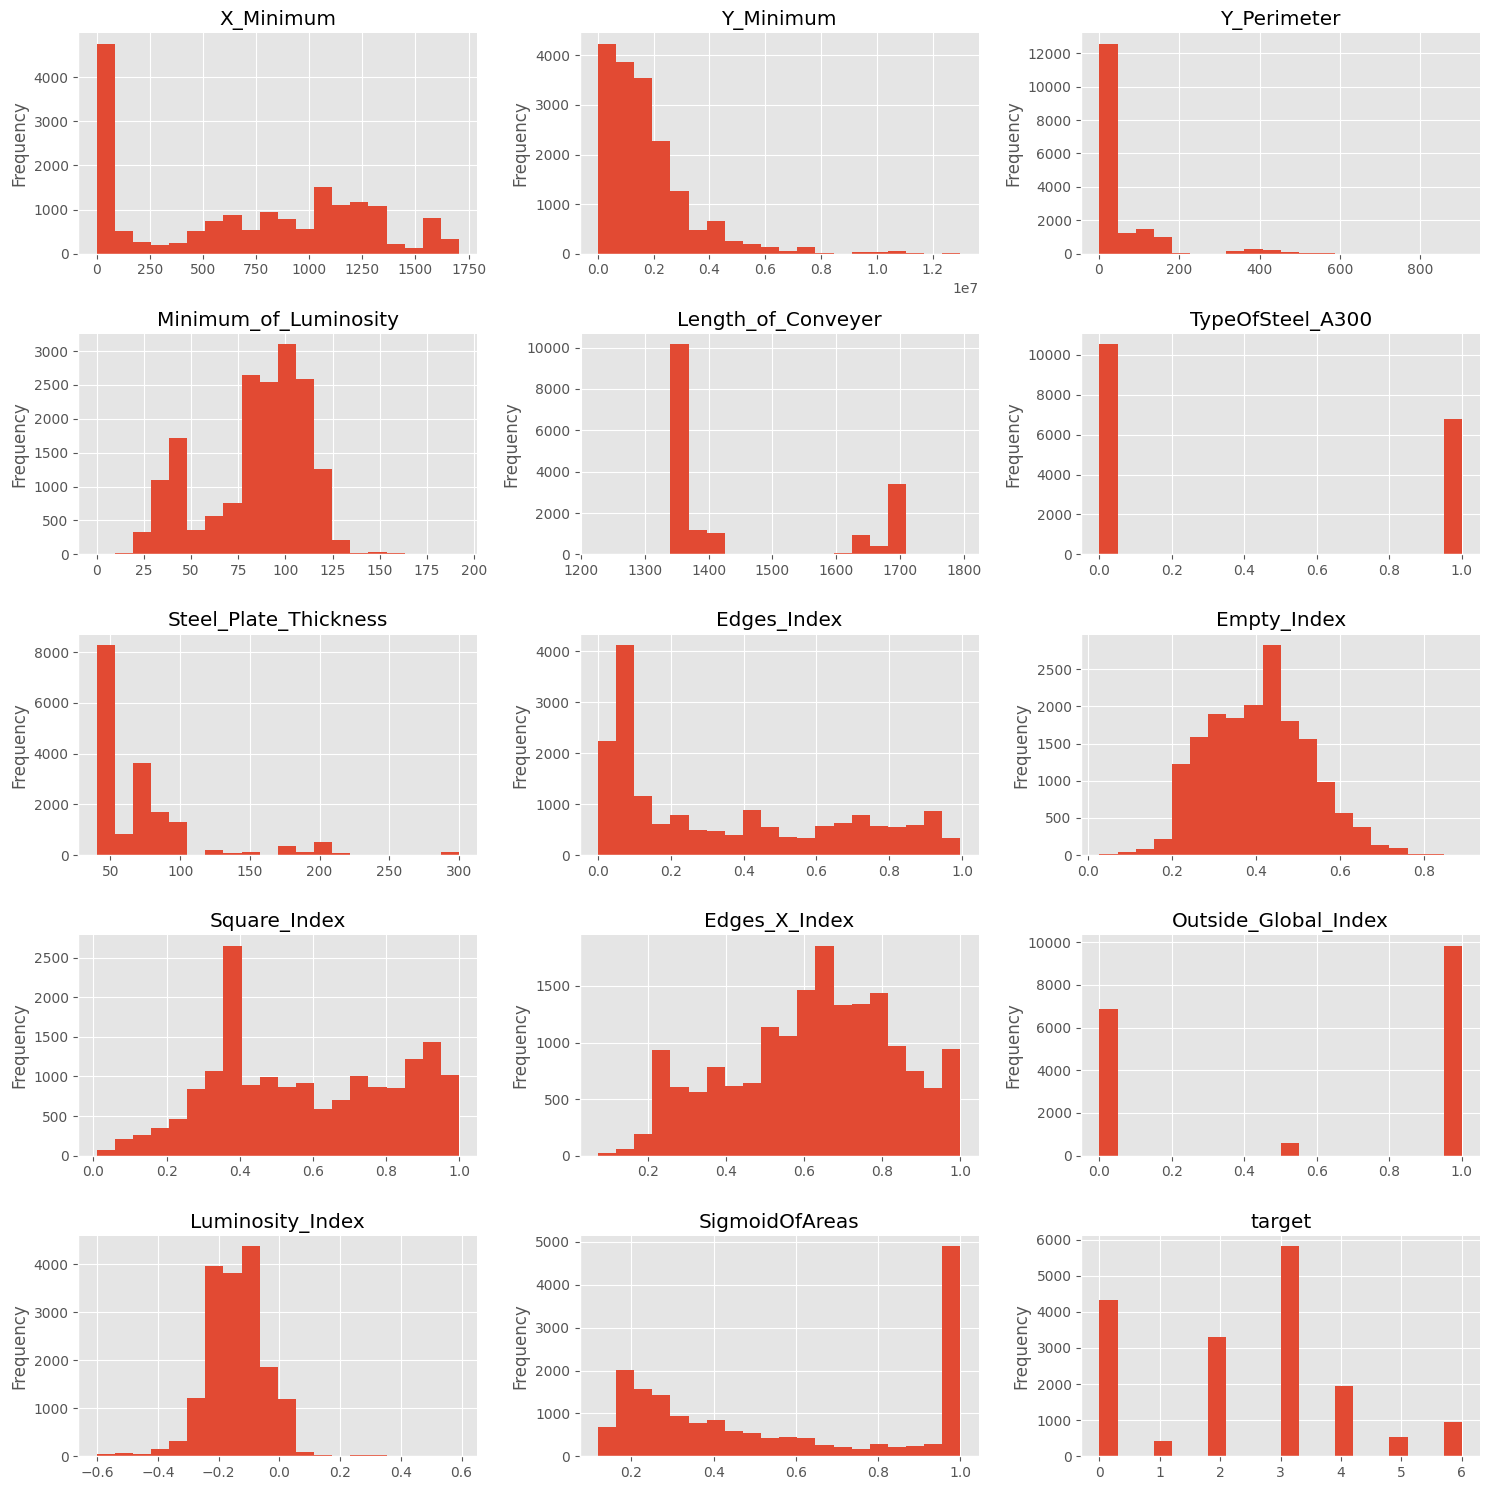

In [26]:
plt.figure(figsize=(15, 15))
i = 1
for c in data3.columns:
    plt.subplot(5, 3, i)
    data3[c].plot(kind='hist', bins=20, title=c)
    plt.gca().spines[['top', 'right']].set_visible(False)
    i += 1

# Adjust layout
plt.tight_layout()
plt.show()


In [23]:
column_to_transform=['X_Minimum', 'Y_Minimum', 'Y_Perimeter', 'Minimum_of_Luminosity',
                     'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index','Edges_X_Index','Luminosity_Index', 'SigmoidOfAreas',]

In [24]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data3[column_to_transform] = pt.fit_transform(data3[column_to_transform])


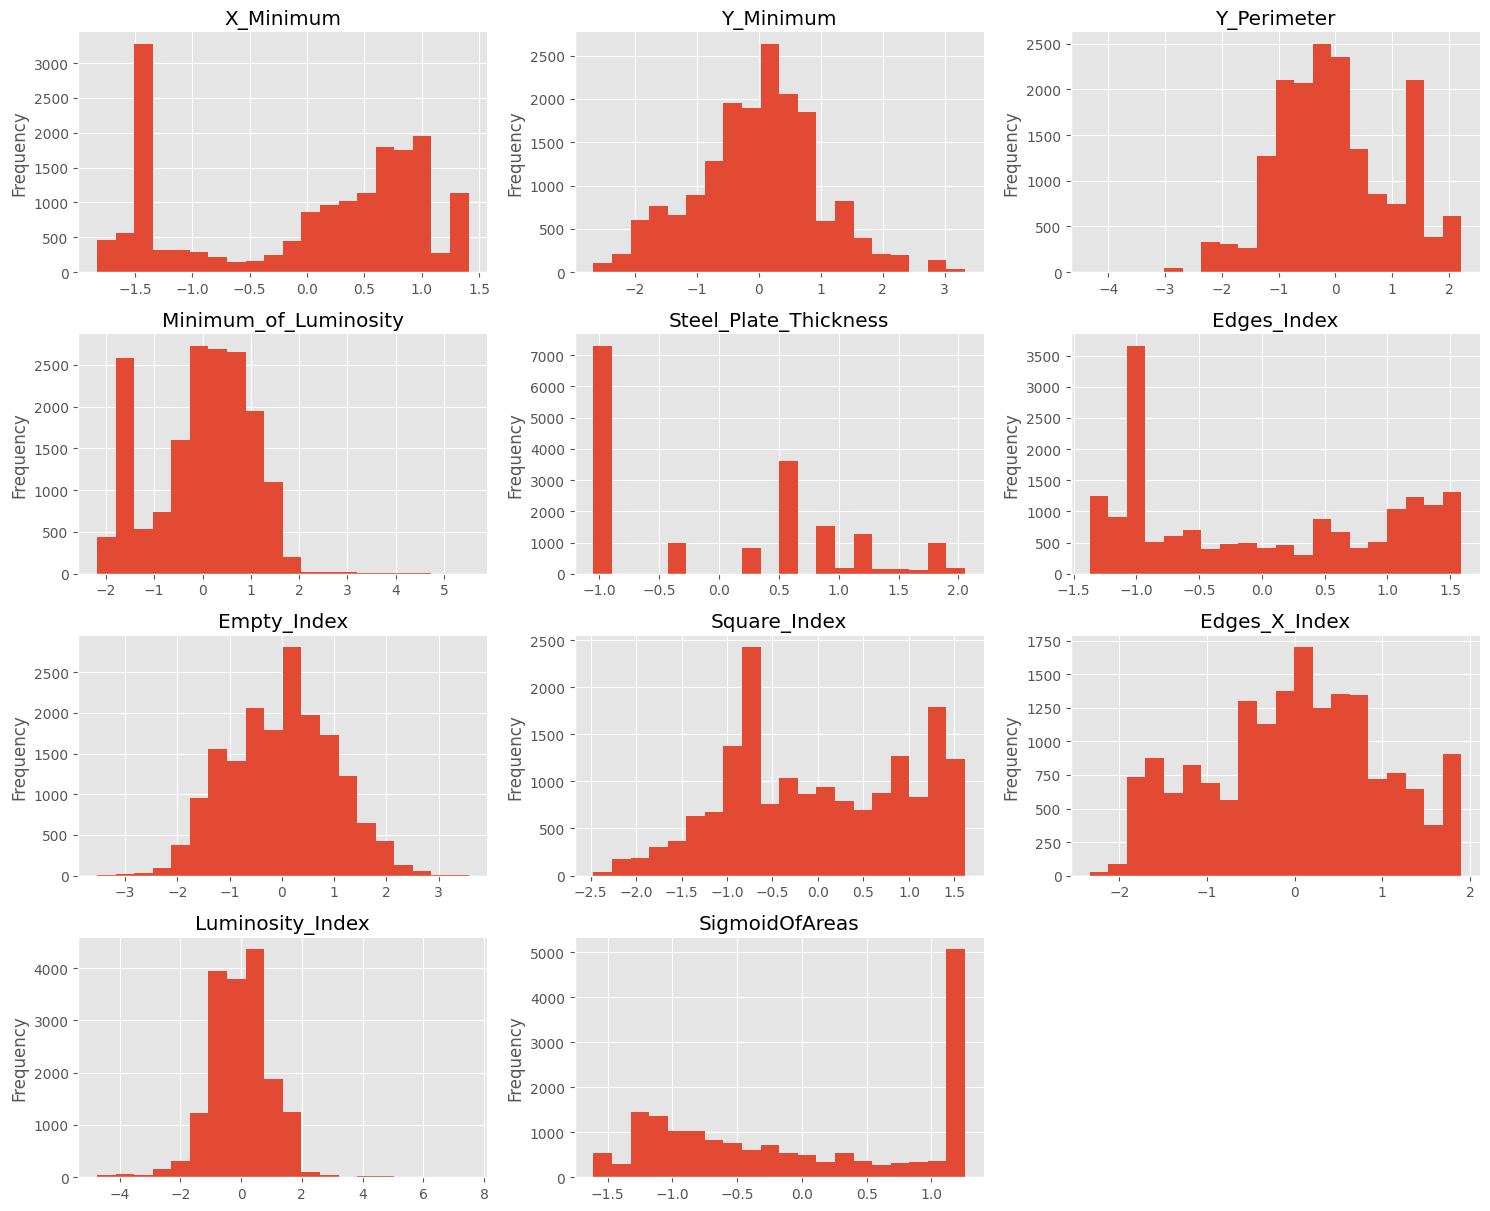

In [29]:
plt.figure(figsize=(15, 15))
i = 1
for c in column_to_transform:
    plt.subplot(5, 3, i)
    data3[c].plot(kind='hist', bins=20, title=c)
    plt.gca().spines[['top', 'right']].set_visible(False)
    i += 1

# Adjust layout
plt.tight_layout()
plt.show()


In [25]:
X=data3.drop('target',axis=1)

In [32]:
X.columns

Index(['X_Minimum', 'Y_Minimum', 'Y_Perimeter', 'Minimum_of_Luminosity',
       'Length_of_Conveyer', 'TypeOfSteel_A300', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Edges_X_Index',
       'Outside_Global_Index', 'Luminosity_Index', 'SigmoidOfAreas'],
      dtype='object')

In [26]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)

In [28]:
test3[column_to_transform] = pt.fit_transform(test3[column_to_transform])
test3=MinMaxScaler().fit_transform(test3)

# **Maching Learning modelling for 2nd processing**

In [29]:
test3

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,p1,p2,p3,p4,p5
0,0.778219,0.602459,0.687390,0.294266,0.004291,0.002010,0.619402,0.005334,0.252484,0.416667,...,0.296635,0.344089,0.846710,0.597816,0.936210,0.294260,0.031345,0.472854,0.985420,0.477944
1,0.864941,0.741803,0.318539,0.031835,0.002398,0.002297,0.545604,0.003344,0.373972,0.439815,...,0.215373,0.289613,0.965596,0.647704,0.930790,0.031831,0.028650,0.473331,0.981260,0.476792
2,0.898528,0.800937,0.183294,0.008551,0.001867,0.003255,0.566464,0.002489,0.419880,0.449074,...,0.376932,0.258029,0.237773,0.706940,0.700424,0.008549,0.027763,0.473394,0.980744,0.476596
3,0.303701,0.096019,0.250183,0.017388,0.000498,0.000766,0.378033,0.000695,0.451057,0.476852,...,0.136695,0.187078,0.596875,0.689735,0.143669,0.017387,0.026074,0.473434,0.980886,0.477003
4,0.578302,0.344262,0.351917,0.041419,0.000891,0.001627,0.437854,0.001293,0.430223,0.449074,...,0.376932,0.213533,0.213548,0.680736,0.440397,0.041418,0.026719,0.473378,0.981118,0.476795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,0.810163,0.651054,0.326632,0.033993,0.002024,0.002872,0.588292,0.001818,0.309618,0.305556,...,0.341583,0.336685,0.894244,0.542780,0.913871,0.033990,0.027198,0.473373,0.000202,0.477828
12810,0.875730,0.762295,0.645944,0.242110,0.000360,0.000670,0.471089,0.000407,0.482669,0.481481,...,0.193015,0.241125,0.871902,0.706209,0.128253,0.242109,0.026477,0.473085,0.002908,0.476729
12811,0.146936,0.120609,0.515401,0.121753,0.108614,0.076003,0.858387,0.160266,0.071397,0.490741,...,0.734744,0.496804,0.472340,0.686112,1.000000,0.121560,0.178970,0.468472,0.016705,0.508759
12812,0.889022,0.782201,0.386881,0.053582,0.002502,0.003925,0.575686,0.003135,0.247830,0.402778,...,0.296635,0.325972,0.934959,0.574267,0.824904,0.053578,0.028517,0.473303,0.000299,0.477498


In [30]:
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,p1,p2,p3,p4,p5
0,0.586269,0.342891,0.420653,0.069583,0.000066,0.000795,0.342200,0.000175,0.505279,0.471963,...,0.223306,0.173307,0.246654,0.696595,0.039652,0.069688,0.000607,0.486455,0.356359,0.080685
1,0.689974,0.475132,0.387894,0.055593,0.002797,0.002384,0.758247,0.003816,0.279538,0.336449,...,0.176983,0.429524,0.873845,0.506744,0.961498,0.055696,0.004213,0.486491,0.356858,0.115329
2,0.140628,0.110006,0.571903,0.169896,0.074563,0.093100,0.953486,0.113116,0.094686,0.476636,...,0.696510,0.547814,0.493864,0.645716,1.000000,0.169890,0.113639,0.486442,0.368147,0.114018
3,0.678342,0.459333,0.655625,0.257797,0.001336,0.001854,0.671511,0.000255,0.510821,0.443925,...,0.176983,0.354895,0.835867,0.678947,0.423716,0.257880,0.001098,0.486053,0.357163,0.106843
4,0.950912,0.910474,0.365003,0.047129,0.003374,0.009270,0.784906,0.004139,0.339853,0.336449,...,0.413159,0.466318,0.961669,0.545431,0.999852,0.047232,0.004518,0.486509,0.356832,0.212856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,0.664284,0.440609,0.198176,0.010515,0.000072,0.000265,0.293269,0.000168,0.555572,0.471963,...,0.176983,0.149282,0.426999,0.705194,0.272526,0.010627,0.000471,0.486581,0.356287,0.102823
19215,0.652630,0.427736,0.594696,0.191189,0.001474,0.001986,0.654674,0.002319,0.455952,0.439252,...,0.274599,0.350829,0.863896,0.642892,0.583235,0.191278,0.003015,0.486199,0.356519,0.101853
19216,0.044528,0.015799,0.510260,0.121055,0.005070,0.014832,0.827951,0.006113,0.144698,0.257009,...,0.419241,0.463442,0.888996,0.409284,0.999777,0.121146,0.006652,0.486353,0.357996,0.011912
19217,0.058234,0.008192,0.524762,0.131459,0.000786,0.001457,0.654674,0.001256,0.370844,0.434579,...,0.274599,0.350829,0.984496,0.631940,0.356654,0.131556,0.001822,0.486325,0.356721,0.007721


In [31]:
y=data3['target']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2003)

In [33]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from  xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(x_train, y_train)

train_prob = clf.predict_proba(x_train)
test_prob = clf.predict_proba(x_test)

# Binarize the labels
y_train_bin = label_binarize(y_train, classes=clf.classes_)
y_test_bin = label_binarize(y_test, classes=clf.classes_)

# Compute ROC AUC for each class
train_roc_auc = roc_auc_score(y_train_bin, train_prob, average='macro')
test_roc_auc = roc_auc_score(y_test_bin, test_prob, average='macro')

print("Training ROC AUC (macro average):", train_roc_auc)
print("Test ROC AUC (macro average):", test_roc_auc)

Training ROC AUC (macro average): 0.9934575651487625
Test ROC AUC (macro average): 0.870062616452968


In [38]:
import optuna
from optuna.samplers import CmaEsSampler

def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'objective': 'multi:softmax',
        'num_class': len(set(y)),
        'random_state': 35
    }

    model = XGBClassifier(**params)
    model.fit(x_train, y_train)

    y_prob = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')

    return roc_auc

if __name__ == "__main__":
    study = optuna.create_study(direction='maximize',sampler=CmaEsSampler())
    study.optimize(objective, n_trials=50)

    print('Best trial:')
    trial = study.best_trial
    print('ROC AUC:', trial.value)
    print("Best hyperparameters:", trial.params)


[I 2024-03-04 14:14:32,652] A new study created in memory with name: no-name-97cfede0-68c3-4c65-9949-c845ede1f449
[I 2024-03-04 14:15:17,168] Trial 0 finished with value: 0.8780670502179742 and parameters: {'n_estimators': 824, 'max_depth': 31, 'learning_rate': 0.10403944308857248, 'subsample': 0.9939118473919474, 'colsample_bytree': 0.5685814511480016, 'gamma': 4.599740928888047, 'min_child_weight': 4.518772080322909, 'reg_alpha': 1.444878628377484, 'reg_lambda': 3.813381171864121}. Best is trial 0 with value: 0.8780670502179742.
[I 2024-03-04 14:15:34,266] Trial 1 finished with value: 0.8734824693491007 and parameters: {'n_estimators': 604, 'max_depth': 19, 'learning_rate': 0.16001286707091308, 'subsample': 0.4938516745831524, 'colsample_bytree': 0.6529351239224054, 'gamma': 0.9113440587220839, 'min_child_weight': 7.033270692578457, 'reg_alpha': 2.5233380010126005, 'reg_lambda': 2.7832679800349966}. Best is trial 0 with value: 0.8780670502179742.
[I 2024-03-04 14:15:42,245] Trial 2 f

Best trial:
ROC AUC: 0.8823449637461279
Best hyperparameters: {'n_estimators': 539, 'max_depth': 9, 'learning_rate': 0.06382186995481101, 'subsample': 0.6560537225318904, 'colsample_bytree': 0.5086983799512446, 'gamma': 2.6527888131840687, 'min_child_weight': 5.087891505293781, 'reg_alpha': 1.74950287964886, 'reg_lambda': 1.8527012751812746}


In [50]:
params={'n_estimators': 539, 'max_depth': 9, 'learning_rate': 0.06382186995481101, 'subsample': 0.6560537225318904, 'colsample_bytree': 0.5086983799512446, 'gamma': 2.6527888131840687, 'min_child_weight': 5.087891505293781, 'reg_alpha': 1.74950287964886, 'reg_lambda': 1.8527012751812746}

xgb_tuned=XGBClassifier(**params)

In [44]:
xgb_tuned.fit(x_train, y_train)

train_prob = xgb_tuned.predict_proba(x_train)
test_prob = xgb_tuned.predict_proba(x_test)

y_train_bin = label_binarize(y_train, classes=xgb_tuned.classes_)
y_test_bin = label_binarize(y_test, classes=xgb_tuned.classes_)

train_roc_auc = roc_auc_score(y_train_bin, train_prob, average='macro')
test_roc_auc = roc_auc_score(y_test_bin, test_prob, average='macro')

print("Training ROC AUC (macro average):", train_roc_auc)
print("Test ROC AUC (macro average):", test_roc_auc)

Training ROC AUC (macro average): 0.907422060171379
Test ROC AUC (macro average): 0.8811967958301802


In [45]:
xgb_tuned.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [46]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score

n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=38)

# Perform cross-validation predictions
cv_probs = cross_val_predict(xgb_tuned, X, y, cv=cv, method='predict_proba')

# Calculate ROC AUC scores
roc_auc_scores = roc_auc_score(label_binarize(y, classes=xgb_tuned.classes_), cv_probs, average=None)

print("ROC AUC scores for each class:", roc_auc_scores)
print("Mean ROC AUC:", np.mean(roc_auc_scores))
print("Standard deviation of ROC AUC:", np.std(roc_auc_scores))


ROC AUC scores for each class: [0.81289049 0.89042724 0.98551428 0.70771948 0.77407598 0.99219428
 0.96160737]
Mean ROC AUC: 0.8749184462544723
Standard deviation of ROC AUC: 0.10400049034910425


In [71]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Define the number of folds for cross-validation
num_folds = 20
fold_size = len(X) // num_folds

# Initialize lists to store AUC-ROC scores for each fold
auc_roc_scores = []

# Iterate over each fold
for fold in range(num_folds):
    # Define the indices for train and test sets for this fold
    start_index = fold * fold_size
    end_index = start_index + fold_size

    # Ensure that the last fold includes any remaining data points
    if fold == num_folds - 1:
        end_index = len(X)

    # Split data into train and test sets for this fold
    X_train = np.concatenate([X[:start_index], X[end_index:]], axis=0)
    y_train = np.concatenate([y_[:start_index], y_[end_index:]], axis=0)
    X_test = X[start_index:end_index]
    y_test = y_[start_index:end_index]

    # Fit the model on the train set
    model = xgb_tuned.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_pred_prob = model.predict_proba(X_test)

    # Calculate AUC-ROC score for each class
    auc_roc = []
    for i in range(y_test.shape[1]):
        auc_roc.append(roc_auc_score(y_test[:, i], y_pred_prob[:, i]))

    # Calculate the mean AUC-ROC score for the fold
    mean_auc_roc = np.mean(auc_roc)

    # Append the mean AUC-ROC score to the list
    auc_roc_scores.append(mean_auc_roc)

# Calculate the overall mean AUC-ROC score across all folds
mean_auc_roc_overall = np.mean(auc_roc_scores)

# Print the mean AUC-ROC score for each fold and overall
print("AUC-ROC scores for each fold:", auc_roc_scores)
print("Mean AUC-ROC score across all folds:", mean_auc_roc_overall)


AUC-ROC scores for each fold: [0.865689684731508, 0.8821438332371766, 0.8682891756867505, 0.8656736471720146, 0.8822821530266942, 0.8715148434387446, 0.874928978342451, 0.878768298435087, 0.8665070471425954, 0.8751542419573459, 0.8621405161106336, 0.8733021663781713, 0.876885516097797, 0.8775800358344934, 0.8942321825824033, 0.8615911746262489, 0.8917121208503662, 0.8604087439049309, 0.863688825582598, 0.8708780014750743]
Mean AUC-ROC score across all folds: 0.8731685593306542


In [47]:
sub__=test[['id','X_Minimum']]

In [51]:
xgb_tuned.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5086983799512446, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2.6527888131840687,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06382186995481101,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5.087891505293781, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=539,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [52]:
print(X.shape)
print(test3.shape)

(19219, 32)
(12814, 32)


In [53]:
sub__[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]=xgb_tuned.predict_proba(test3)

<ipython-input-53-9e582436b764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub__[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]=xgb_tuned.predict_proba(test3)
<ipython-input-53-9e582436b764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub__[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]=xgb_tuned.predict_proba(test3)
<ipython-input-53-9e582436b764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [54]:
sub__.drop('X_Minimum',axis=1,inplace=True)

<ipython-input-54-8a9992f01d0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub__.drop('X_Minimum',axis=1,inplace=True)


In [55]:
sub__.to_csv('sub_xgb_tuned.csv',index=False)

In [56]:
sub__.tail()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
12809,32028,0.298284,0.035182,0.005525,0.430711,0.200835,0.001226,0.028236
12810,32029,0.094158,0.099825,0.039134,0.436882,0.304306,0.021082,0.004613
12811,32030,0.003294,0.001382,0.913744,0.065173,0.015224,0.000445,0.000738
12812,32031,0.116562,0.050688,0.045849,0.343138,0.437373,0.000889,0.005500
12813,32032,0.004675,0.001837,0.888824,0.069294,0.031633,0.000493,0.003244


# **ANN for 2nd processing**

In [88]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout ,BatchNormalization

In [89]:
X.shape

(17297, 14)

In [91]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def compute_roc_auc(y_true, y_prob):
    y_bin = label_binarize(y_true, classes=np.unique(y_true))
    roc_auc = roc_auc_score(y_bin, y_prob, average='macro')
    return roc_auc

# Assuming you have already defined your neural network model and compiled it

# Train the model
for epoch in range(1, 30):  # 10 epochs
    model.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test), verbose=0)
    y_prob_train = model.predict(x_train)
    roc_auc_train = compute_roc_auc(y_train, y_prob_train)
    y_prob_val = model.predict(x_test)
    roc_auc_val = compute_roc_auc(y_test, y_prob_val)
    print(f"Epoch {epoch}: Training ROC AUC = {roc_auc_train:.4f}         ,          Validation ROC AUC = {roc_auc_val:.4f}           ")


109/109 [==============================] - 0s 2ms/step
Epoch 1: Training ROC AUC = 0.8391         ,          Validation ROC AUC = 0.8427           
109/109 [==============================] - 0s 2ms/step
Epoch 2: Training ROC AUC = 0.8515         ,          Validation ROC AUC = 0.8546           
109/109 [==============================] - 0s 2ms/step
Epoch 3: Training ROC AUC = 0.8569         ,          Validation ROC AUC = 0.8586           
109/109 [==============================] - 0s 2ms/step
Epoch 4: Training ROC AUC = 0.8578         ,          Validation ROC AUC = 0.8595           
109/109 [==============================] - 0s 2ms/step
Epoch 5: Training ROC AUC = 0.8600         ,          Validation ROC AUC = 0.8612           
109/109 [==============================] - 0s 2ms/step
Epoch 6: Training ROC AUC = 0.8611         ,          Validation ROC AUC = 0.8622           
109/109 [==============================] - 0s 2ms/step
Epoch 7: Training ROC AUC = 0.8619         ,          Val

In [92]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

In [93]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
X.shape

(17297, 14)

In [98]:
y_.shape

(17297, 7)

In [99]:
model.fit(X, y, batch_size=32,epochs=50, verbose=2)

Epoch 1/50
541/541 - 3s - loss: 1.4107 - accuracy: 0.2573 - 3s/epoch - 5ms/step
Epoch 2/50
541/541 - 2s - loss: 1.1783 - accuracy: 0.2503 - 2s/epoch - 3ms/step
Epoch 3/50
541/541 - 2s - loss: 1.1242 - accuracy: 0.2424 - 2s/epoch - 4ms/step
Epoch 4/50
541/541 - 1s - loss: 1.1039 - accuracy: 0.2383 - 1s/epoch - 3ms/step
Epoch 5/50
541/541 - 1s - loss: 1.0914 - accuracy: 0.2367 - 1s/epoch - 3ms/step
Epoch 6/50
541/541 - 1s - loss: 1.0853 - accuracy: 0.2388 - 1s/epoch - 3ms/step
Epoch 7/50
541/541 - 1s - loss: 1.0713 - accuracy: 0.2341 - 1s/epoch - 3ms/step
Epoch 8/50
541/541 - 2s - loss: 1.0620 - accuracy: 0.2385 - 2s/epoch - 3ms/step
Epoch 9/50
541/541 - 1s - loss: 1.0633 - accuracy: 0.2306 - 1s/epoch - 3ms/step
Epoch 10/50
541/541 - 2s - loss: 1.0535 - accuracy: 0.2442 - 2s/epoch - 3ms/step
Epoch 11/50
541/541 - 2s - loss: 1.0508 - accuracy: 0.2302 - 2s/epoch - 4ms/step
Epoch 12/50
541/541 - 1s - loss: 1.0499 - accuracy: 0.2402 - 1s/epoch - 3ms/step
Epoch 13/50
541/541 - 1s - loss: 1.04

In [103]:
sub_nn = model.predict(test3)


401/401 [==============================] - 2s 4ms/step


In [104]:
sub_nn=test[['id','X_Minimum']]

In [105]:
sub_nn[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]=model.predict(test3)

401/401 [==============================] - 1s 3ms/step


<ipython-input-105-6c97c8f62378>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_nn[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]=model.predict(test3)
<ipython-input-105-6c97c8f62378>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_nn[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]=model.predict(test3)
<ipython-input-105-6c97c8f62378>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [108]:
sub_nn.drop('X_Minimum',axis=1,inplace=True)

<ipython-input-108-90db0a1a273d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_nn.drop('X_Minimum',axis=1,inplace=True)


In [109]:
sub_nn.to_csv('sub_nn.csv',index=False)